### MySQL Exercise

You have 45 minutes for this exercise. You will be randomly be assigned to class colleague and the two of get a separate virual room where you cam solve the exercise togehter. When you have finished, please return to the main virtual room.

**Task**
- Check if there is visible correlation between payment amount and postal code of the customer, i.e. make a scatter plot.  
- Calculate the total price for all orders in the database per product line.
How much you do in SQL directly and how much with dataframes is up to you. 

**Have fun and start here:**

- Study MySQL-PDF.pdf in a different browser tab for an overview of the database to be used. The pdf is in the 05-Databases folder on Ilias 
- Connect to the database classicmodels which is running on computer host.

In [1]:
# mysql is in package "conda install mysql-connector-python"
import mysql.connector
import pandas as pd 
my_connect = mysql.connector.connect(
      host="fl-5-232.zhdk.cloud.switch.ch",
      port=3306,
      user="user",
      passwd="fum+Apheb4",
      #database='training'
      database="classicmodels"
    )
####### end of connection ####


Now check that you can read the tables:

In [7]:
df_prodline = pd.read_sql("SELECT amount, postalCode FROM payments, customers WHERE payments.customerNumber = customers.customerNumber",my_connect)
df_prodline

,amount,postalCode
0,6066.78,44000
1,14571.44,44000
2,1676.14,44000
3,14191.12,83030
4,32641.98,83030
...,...,...
268,59265.14,51003
269,6276.60,51003
270,30253.75,None
271,32077.44,None


Now continue with your task!

In [10]:
# Scatter plot showing payment amount versus postal code
# Your code comes here
table_pay_v_postal=pd.read_sql("SELECT postalCode, amount from customers, payments WHERE customers.customerNumber = payments.customerNumber", my_connect)
table_pay_v_postal


,postalCode,amount
0,44000,6066.78
1,44000,14571.44
2,44000,1676.14
3,83030,14191.12
4,83030,32641.98
...,...,...
268,51003,59265.14
269,51003,6276.60
270,None,30253.75
271,None,32077.44


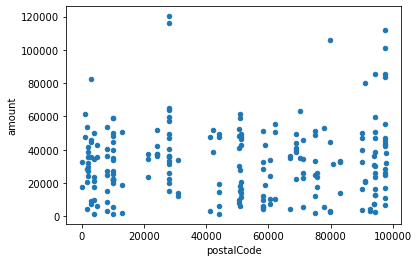

In [25]:
import pandas
import numpy as np
import matplotlib

df=DataFrame(table_pay_v_postal, columns=["postalCode", "amount"])
#in order to plot this dataframe we first need to convert postcode values to numeric and define what it needs to do when running into "None"-values
df["postalCode"]=pandas.to_numeric(df["postalCode"], errors="coerce")
df.plot(kind="scatter", x="postalCode", y="amount")

In [38]:
# One possibility getting total price for all orders per product line
# Your code comes here
price_product_order=pd.read_sql("SELECT orderdetails.orderNumber, orderdetails.productCode, orderdetails.quantityOrdered*orderdetails.priceEach AS totalPrice, products.productLine FROM orderdetails, products WHERE products.productCode=orderdetails.productCode ", my_connect)
price_product_order


,orderNumber,productCode,totalPrice,productLine
0,10103,S10_1949,5571.80,Classic Cars
1,10112,S10_1949,5717.64,Classic Cars
2,10126,S10_1949,7817.74,Classic Cars
3,10140,S10_1949,6898.28,Classic Cars
4,10150,S10_1949,8197.20,Classic Cars
...,...,...,...,...
2991,10375,S50_1341,1774.78,Vintage Cars
2992,10388,S50_1341,1107.54,Vintage Cars
2993,10398,S50_1341,1903.16,Vintage Cars
2994,10401,S50_1341,2321.76,Vintage Cars


What is potentially very bad about this solution?

### NB

The server with the database used in this notebook will be shut down tonight. However, installing a mysql data server on your own laptop is quite easy. Google is your friend. It takes maybe 1h for a beginner, 10min for an experienced.